<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Pelatihan_Model_Scorecard_Kredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Persiapan

In [79]:
# Memperbarui Library
!pip install scikit-learn --upgrade

import sklearn as skl
print(skl. __version__) 

# Lalu restart ulang runtime nya

1.0.1


# Membaca Data

## 2.3.2.1 Persiapan data dan impor ke Python

Impor data yang akan digunakan untuk membuat model

In [80]:
# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Credit_Scoring_Dataset.xlsx')

## # 2.3.2.3 Struktur data

In [81]:
# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,gagal_bayar,Lama_Cicilan,Tujuan_Pinjaman,Jumlah_Pinjaman,Pekerjaan,Pendapatan_perbulan,Lama_Bekerja,Status,Kepemilikan_Rumah,Alamat_Rumah,Alamat_Kantor,Usia,Lama_tinggal_ditempat_sekarang,SLIK_Kolektibilitas,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Type,Device_Apps_Installed,Device_Active_Since,Device_Apps_Segmentation,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type
0,ABC0001,0_Bayar,1,elektronik,500000,1_pegawai_tetap,5. >20 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_3,Daerah_3,67.0,4_>10_tahun,Kolek 1,859684.752267,0.000000e+00,305,192,Android,6,2_1_ke_3_tahun,Social_Media,Telco_A,1_Kurang_1_bulan,Public_Domain
1,ABC0002,1_Gagal,1,peralatan_rumahtangga,2000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,1_belum_menikah,1_milik_sendiri,Daerah_2,Daerah_2,22.0,2_1-5_tahun,Kolek 3,743722.804144,1.301412e+06,252,86,IOS,9,3_Lebih_3_tahun,Games,Telco_A,1_Kurang_1_bulan,Public_Domain
2,ABC0003,0_Bayar,3,makanan,1000000,3_wiraswasta,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_1,49.0,3_5-10_tahun,Kolek 1,265387.462890,0.000000e+00,858,97,Android,36,3_Lebih_3_tahun,Games,Telco_A,2_Kurang_1_tahun,Public_Domain
3,ABC0004,0_Bayar,6,liburan,2000000,1_pegawai_tetap,1. < 1 juta,4_4-7_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_1,45.0,4_>10_tahun,Kolek 3,443234.967513,8.094420e+05,108,159,Android,14,3_Lebih_3_tahun,Online_Lending,Telco_E,2_Kurang_1_tahun,Professional_Domain
4,ABC0005,1_Gagal,4,pendidikan,1000000,1_pegawai_tetap,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_3,Daerah_3,53.0,4_>10_tahun,Kolek 2,102046.058576,7.548064e+05,487,63,Android,10,3_Lebih_3_tahun,Shopping,Telco_D,1_Kurang_1_bulan,Public_Domain
5,ABC0006,0_Bayar,5,makanan,500000,3_wiraswasta,5. >20 juta,3_1-4_tahun_kerja,2_menikah,3_bersama_keluarga,Daerah_1,Daerah_2,35.0,4_>10_tahun,Kolek 3,480608.200003,3.222612e+06,595,200,Android,5,3_Lebih_3_tahun,Social_Media,Telco_A,2_Kurang_1_tahun,Public_Domain
6,ABC0007,0_Bayar,1,liburan,500000,1_pegawai_tetap,3. 5 - 10 juta,5_>7_tahun_kerja,2_menikah,1_milik_sendiri,Daerah_2,Daerah_3,53.0,4_>10_tahun,Kolek 3,133535.433266,4.303138e+05,334,172,Android,37,3_Lebih_3_tahun,Productivity,Telco_C,5_Lebih_5_tahun,Public_Domain
7,ABC0008,0_Bayar,5,buka_bisnis,500000,4_tidak_bekerja,1. < 1 juta,3_1-4_tahun_kerja,2_menikah,2_sewa,Daerah_1,Daerah_1,35.0,2_1-5_tahun,Kolek 3,384367.579947,5.326622e+04,107,186,Android,35,3_Lebih_3_tahun,Productivity,Telco_E,5_Lebih_5_tahun,Public_Domain
8,ABC0009,0_Bayar,1,peralatan_rumahtangga,500000,3_wiraswasta,4. 10 - 20 juta,4_4-7_tahun_kerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_1,61.0,4_>10_tahun,Kolek 3,527874.467181,1.954899e+06,45,235,IOS,17,2_1_ke_3_tahun,Social_Media,Telco_A,3_1_ke_2_tahun,Public_Domain
9,ABC0010,1_Gagal,3,liburan,500000,4_tidak_bekerja,1. < 1 juta,1_tidak_bekerja,3_bercerai,1_milik_sendiri,Daerah_2,Daerah_2,28.0,2_1-5_tahun,Kolek 1,226586.344920,0.000000e+00,254,285,Android,17,2_1_ke_3_tahun,Social_Media,Telco_C,1_Kurang_1_bulan,Public_Domain


In [82]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              1000 non-null   object 
 1   gagal_bayar                     1000 non-null   object 
 2   Lama_Cicilan                    1000 non-null   int64  
 3   Tujuan_Pinjaman                 1000 non-null   object 
 4   Jumlah_Pinjaman                 1000 non-null   int64  
 5   Pekerjaan                       988 non-null    object 
 6   Pendapatan_perbulan             990 non-null    object 
 7   Lama_Bekerja                    973 non-null    object 
 8   Status                          996 non-null    object 
 9   Kepemilikan_Rumah               997 non-null    object 
 10  Alamat_Rumah                    1000 non-null   object 
 11  Alamat_Kantor                   1000 non-null   object 
 12  Usia                            999

## # 2.3.2.4 Tipe data

In [83]:
# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['gagal_bayar'] = df.gagal_bayar.astype('category')
df['Pekerjaan'] = df.Pekerjaan.astype('category')
df['Tujuan_Pinjaman'] = df.Tujuan_Pinjaman.astype('category')
df['Pendapatan_perbulan'] = df.Pendapatan_perbulan.astype('category')
df['Lama_Bekerja'] = df.Lama_Bekerja.astype('category')
df['Status'] = df.Status.astype('category')
df['Kepemilikan_Rumah'] = df.Kepemilikan_Rumah.astype('category')
df['Alamat_Rumah'] = df.Alamat_Rumah.astype('category')
df['Alamat_Kantor'] = df.Alamat_Kantor.astype('category')
df['Lama_tinggal_ditempat_sekarang'] = df.Lama_tinggal_ditempat_sekarang.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['SLIK_Kolektibilitas'] = df.SLIK_Kolektibilitas.astype('category')
df['Device_Apps_Segmentation'] = df.Device_Apps_Segmentation.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan intger untuk angka bulat
df['API_CreditScore_Vendor_A'] = df.API_CreditScore_Vendor_A.astype('int64')
df['API_CreditScore_Vendor_B'] = df.API_CreditScore_Vendor_B.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')

# Merubah tipe data menjadi tipe karakter float64
# Gunakan intger untuk angka dengan koma
# Jika dalam kolom tersebut terdapat null, maka harus di simpan dalam tipe float
df['Lama_Cicilan'] = df.Lama_Cicilan.astype('float64')
df['Usia'] = df.Usia.astype('float64')
df['Jumlah_Pinjaman'] = df.Jumlah_Pinjaman.astype('float64')
df['SLIK_Cicilan_Bulanan'] = df.SLIK_Cicilan_Bulanan.astype('float64')
df['SLIK_Outstanding_CC'] = df.SLIK_Outstanding_CC.astype('float64')

## 2.3.2.5.3 Mengidentifikasi outlier dan validitas data

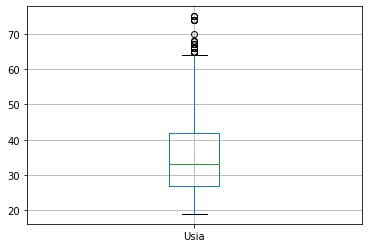

In [84]:
df.boxplot(column=['Usia'])

## Latihan membuat Box Plot

In [85]:
# Latihan untuk boxplot variabel SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC, Lama_Cicilan, dan Jumlah_Pinjaman
# Tulis kode disini



# Missing Data Treatment (Apa yang harus dilakukan terhadap data yang kosong?)

## 2.3.2.5.4.1 Imputasi baris data yang kosong dengan asumsi nilai


In [86]:
# Koding berikut menggantikan missing value dari semua variabel dengan
# nilai yang paling sering muncul (modus) untuk variabel kategori dan nilai rata-rata untuk variabel numerik

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  df_numerik[kolom].fillna(df_numerik[kolom].mean(), inplace=True)

for kolom in df_kategori.columns:
  df_kategori[kolom].fillna(df_kategori[kolom].mode()[0], inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_1 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## # 2.3.2.5.4.2 Tidak menggunakan baris data yang kosong (Drop Data)


In [87]:
# Menggunakan fungsi dropna() untuk menghapus semua baris yang memiliki data kosong
df_pembersihan_2 = df.dropna()

## 2.3.2.5.4.3 Tidak menggunakan kolom data yang kosong (Drop Variable)


In [88]:
# Menggunakan fungsi dropna() untuk menghapus kolom yang memiliki data kosong
df_pembersihan_3 = df.dropna(axis='columns')

## 2.3.2.5.4.4 Kategorikan data yang kosong (Flag)

In [89]:
# Koding berikut memberikan tanda flagging untuk baris data yang berisikan baris data kosong

# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df.select_dtypes(include=['float64','int64','int'])
df_kategori = df.select_dtypes(exclude = ['float64','int64','int'])

for kolom in df_numerik.columns:
  # Membuat kolom baru untuk baris data yang kosong
  df_numerik[kolom+"_missing"] = df_numerik[kolom].isnull()
  df_numerik[kolom].fillna(0, inplace=True)

for kolom in df_kategori.columns:
  # Kolom kategori harus secara eksplisit menambahkan data kategori baru
  df_kategori[kolom] = df_kategori[kolom].cat.add_categories("00_Data_Kosong")
  df_kategori[kolom].fillna("00_Data_Kosong", inplace=True)

# Menggabungkan dataset variabel kategori dan dengan variabel numerik
df_pembersihan_4 = pd.concat([df_numerik, df_kategori], axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [90]:
# Melanjutkan proses dengan asumsi bahwa baris data yang kosong tidak signifikan dan tidak akan terjadi baris data kosong lagi.
df_clean = df_pembersihan_2

In [91]:
# Menghapus indeks dari data yang telah dibuang
df_clean = df_clean.reset_index(drop=True)

In [93]:
df_clean.info()

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_clean.to_csv('df_clean.csv') 
files.download('df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   ID                              948 non-null    category
 1   gagal_bayar                     948 non-null    category
 2   Lama_Cicilan                    948 non-null    float64 
 3   Tujuan_Pinjaman                 948 non-null    category
 4   Jumlah_Pinjaman                 948 non-null    float64 
 5   Pekerjaan                       948 non-null    category
 6   Pendapatan_perbulan             948 non-null    category
 7   Lama_Bekerja                    948 non-null    category
 8   Status                          948 non-null    category
 9   Kepemilikan_Rumah               948 non-null    category
 10  Alamat_Rumah                    948 non-null    category
 11  Alamat_Kantor                   948 non-null    category
 12  Usia                  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Eksplorasi (Explanatory Data Analysis atau EDA)

## 2.3.2.5.5.1 EDA Analisa dasar variabel untuk gagal_bayar

In [94]:
# Untuk melihat frekuensi dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel gagal_bayar
print(df_clean['gagal_bayar'].value_counts(normalize=True) * 100)

0_Bayar    670
1_Gagal    278
Name: gagal_bayar, dtype: int64
0_Bayar    70.675105
1_Gagal    29.324895
Name: gagal_bayar, dtype: float64


## 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas


In [95]:
# Untuk melihat frekuensi dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel SLIK_Kolektabilitas
print(df_clean['SLIK_Kolektibilitas'].value_counts(normalize=True) * 100)

Kolek 3            483
Kolek 1            270
Kolek 2             84
Tidak_Ditemukan     49
Kolek 5             48
Kolek 4             14
Name: SLIK_Kolektibilitas, dtype: int64
Kolek 3            50.949367
Kolek 1            28.481013
Kolek 2             8.860759
Tidak_Ditemukan     5.168776
Kolek 5             5.063291
Kolek 4             1.476793
Name: SLIK_Kolektibilitas, dtype: float64


## 2.3.2.5.5.2 Exploratory Data Analysis untuk SLIK_Kolektabilitas


In [96]:
# Berapa banyak yang gagal bayar dari masing-masing nilai SLIK Kolektabilitas
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']))

# dalam proporsi persentase
print(pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['gagal_bayar'],normalize='index',)*100)

gagal_bayar          0_Bayar  1_Gagal
SLIK_Kolektibilitas                  
Kolek 1                  229       41
Kolek 2                   58       26
Kolek 3                  333      150
Kolek 4                    6        8
Kolek 5                   21       27
Tidak_Ditemukan           23       26
gagal_bayar            0_Bayar    1_Gagal
SLIK_Kolektibilitas                      
Kolek 1              84.814815  15.185185
Kolek 2              69.047619  30.952381
Kolek 3              68.944099  31.055901
Kolek 4              42.857143  57.142857
Kolek 5              43.750000  56.250000
Tidak_Ditemukan      46.938776  53.061224


## 2.3.2.5.5.2 SLIK_Kolektibilitas Data Visualisasi

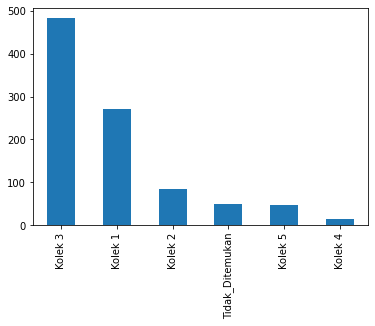

In [97]:
# Fungsi value_counts().plot(kind='bar')
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='bar')

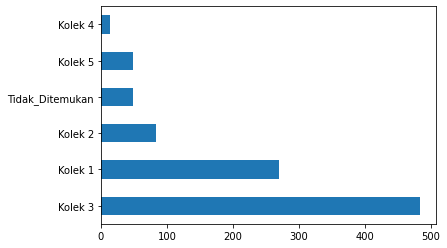

In [98]:
# Menampilkan plot bar secara horizontal
df_clean['SLIK_Kolektibilitas'].value_counts().plot(kind='barh')

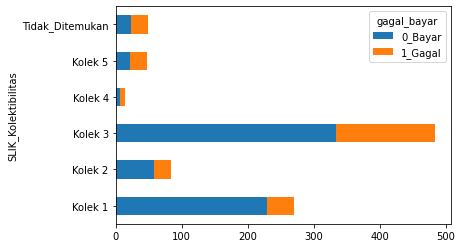

In [99]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar']).plot(kind='barh', stacked=True)

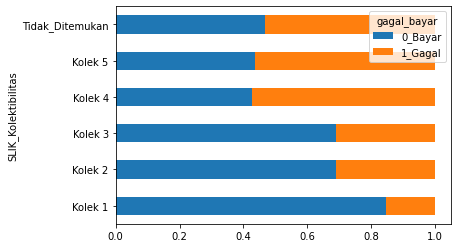

In [100]:
# Nilai variabel SLIK_Kolektibilitas dan proporsi default secara plot bar, secara proporsi
pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['gagal_bayar'], normalize='index').plot(kind='barh', stacked=True)

## Latihan EDA untuk variabel kategori

In [101]:
# Latihan EDA untuk Tujuan_Pinjaman, Lama_Bekerja, atau variabel kategori / teks lainnya
# Tulis kode disini



## 2.3.2.5.5.3 Exploratory Data Analysis untuk Usia

In [102]:
# Rangkuman statistik untuk variabel numerik Usia
print(df_clean['Usia'].describe())

# Rangkuman statistik untuk variabel numerik Usia, berdasarkan default (gagal bayar atau tidak)
df_clean.groupby('gagal_bayar')['Usia'].describe()

count    948.000000
mean      35.548523
std       11.335750
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Usia, dtype: float64


,count,mean,std,min,25%,50%,75%,max
gagal_bayar,,,,,,,,
0_Bayar,670.0,36.116418,11.239140,19.0,27.0,34.0,42.00,75.0
1_Gagal,278.0,34.179856,11.470415,19.0,25.0,31.0,40.75,74.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot')

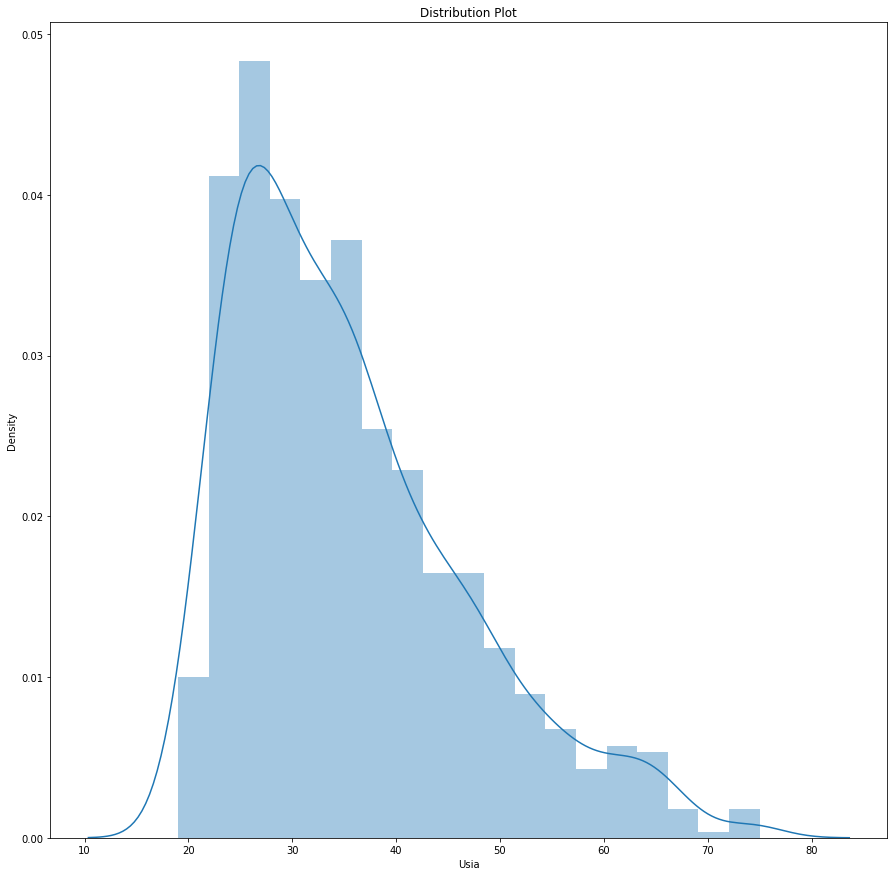

In [103]:
# Fungsi distplot() dari library seaborn
# Perhatikan bahwa distribusi plot harus tidak memiliki data kosong / missing value.
# Oleh karena itu harus menambahkan fungsi dropna() untuk secara sementara tidak
# mengikutsertakan missing value dalam pembuatan plot distribusi

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.distplot(df_clean['Usia'].dropna(), ax=ax).set_title('Distribution Plot')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


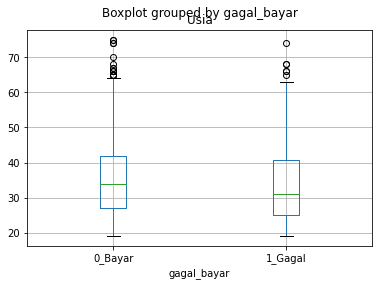

In [104]:
# Menambahkan by di fungsi boxplot untuk membagi boxplot berdasarkan gagal_bayar
df_clean.boxplot(by='gagal_bayar',column=['Usia'])

## Latihan EDA untuk variabel Numerik

In [105]:
# Latihan untuk rangkuman analisa dan visualisasi untuk variabel SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC, Lama_Cicilan, dan Jumlah_Pinjaman
# Tulis kode disini



## Korelasi

In [106]:
import numpy as np

# Untuk dapat melakukan analisa statistik, harus mengubah variabel gagal_bayar dari string menjadi angka (integer)
# Mengubah target variabel gagal_bayar menjadi angka 0 dan 1
conditions = [
             df_clean['gagal_bayar'] == '1_Gagal', 
             df_clean['gagal_bayar'] == '0_Bayar'
             ]

choices     = [
             1,
             0
             ]
df_clean['default'] = np.select(conditions,choices, default = 0)

In [107]:
# Menghitung korelasi antara variabel Usia dengan default
print(df_clean['default'].corr(df_clean['Usia']))

-0.0778147171989035


In [108]:
from scipy import stats

# Uji coba hipotesis apakah ada perbedaan nilai rata-rata variabel 
# API_CreditScore_Vendor_A dengan default (gagal bayar dan tidak gagal bayar)
stats.ttest_ind( df_clean[df_clean.default == 0].Usia,
             	df_clean[df_clean.default == 1].Usia, nan_policy='omit')

Ttest_indResult(statistic=2.400635164816287, pvalue=0.016558910387081596)

## 2.3.2.5.6 Memahami korelasi antar variabel dan dengan target

In [109]:
# Korelasi Antar semua Variabel numerik
import seaborn as sns
corr = df_clean.corr()
corr

,Lama_Cicilan,Jumlah_Pinjaman,Usia,SLIK_Cicilan_Bulanan,SLIK_Outstanding_CC,API_CreditScore_Vendor_A,API_CreditScore_Vendor_B,Device_Apps_Installed,default
Lama_Cicilan,1.000000,0.298788,0.029419,0.000481,0.029004,-0.012322,-0.028463,-0.057698,0.021000
Jumlah_Pinjaman,0.298788,1.000000,0.041210,-0.031538,-0.007841,0.013080,-0.020965,-0.026660,0.132585
Usia,0.029419,0.041210,1.000000,0.007345,-0.008791,0.018705,0.018308,0.032119,-0.077815
SLIK_Cicilan_Bulanan,0.000481,-0.031538,0.007345,1.000000,0.317872,0.034330,-0.056521,-0.003362,0.181373
SLIK_Outstanding_CC,0.029004,-0.007841,-0.008791,0.317872,1.000000,-0.035197,-0.004624,-0.054377,0.185339
API_CreditScore_Vendor_A,-0.012322,0.013080,0.018705,0.034330,-0.035197,1.000000,-0.000716,0.040767,-0.038087
API_CreditScore_Vendor_B,-0.028463,-0.020965,0.018308,-0.056521,-0.004624,-0.000716,1.000000,-0.018533,-0.160338
Device_Apps_Installed,-0.057698,-0.026660,0.032119,-0.003362,-0.054377,0.040767,-0.018533,1.000000,-0.132190
default,0.021000,0.132585,-0.077815,0.181373,0.185339,-0.038087,-0.160338,-0.132190,1.000000


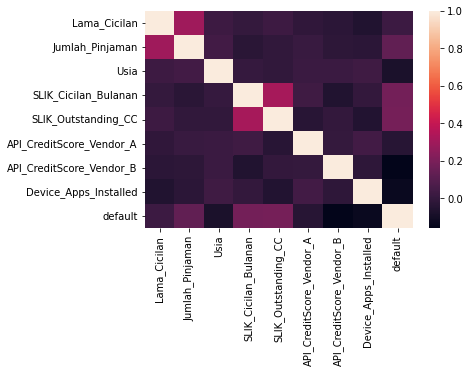

In [110]:
# Korelasi secara visualisasi
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Latihan Korelasi

In [111]:
# Latihan untuk korelasi untuk variabel API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?


In [112]:
# Latihan uji coba hipotesis untuk API_CreditScore_Vendor_A dan Lama_Cicilan
# Tulis kode disini
# Kesimpulan yang didapatkan?



## 2.3.2.5.6.2 Memahami korelasi antar variabel independent kategori


In [114]:
# Memisahkan variabel kategori dengan variabel numerik
df_numerik = df_clean.select_dtypes(include=['float64','int64','int'])
df_kategori = df_clean.select_dtypes(exclude = ['float64','int64','int'])

# Menghapus kolom yang tidak berkaitan dengan korelasi antar variabel independent
df_kategori.drop(columns=['ID', 'gagal_bayar'], inplace=True)

from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.get_dummies(data = df_kategori)

# Kode Python berdasarkan referensi dari https://www.analyticsvidhya.com/blog/2021/06/decoding-the-chi-square-test%E2%80%8A-%E2%80%8Ause-along-with-implementation-and-visualization/
resultant = pd.DataFrame(data=[(0 for i in range(len(df.columns))) for i in range(len(df.columns))], 
                         columns=list(df.columns))
resultant.set_index(pd.Index(list(df.columns)), inplace = True)
for i in list(df.columns):
    for j in list(df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df[i]).reshape(-1, 1), np.array(df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df.to_csv('chi_square.csv') 
files.download('chi_square.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


                                            Tujuan_Pinjaman_buka_bisnis  ...  Email_Domain_Type_Public_Domain
Tujuan_Pinjaman_buka_bisnis                                0.000000e+00  ...                     4.236873e-04
Tujuan_Pinjaman_elektronik                                 3.736414e-22  ...                     8.344980e-04
Tujuan_Pinjaman_liburan                                    1.432841e-05  ...                     7.020366e-02
Tujuan_Pinjaman_makanan                                    1.027722e-06  ...                     2.353050e-01
Tujuan_Pinjaman_pendidikan                                 3.761034e-05  ...                     3.820163e-01
...                                                                 ...  ...                              ...
Mobile_Number_Active_Since_3_1_ke_2_tahun                  5.577441e-01  ...                     1.663092e-01
Mobile_Number_Active_Since_4_2_ke_5_tahun                  1.438647e-01  ...                     2.431699e-01
Mobile_Num

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling Scorecard dengan Library scorecardpy (Cara Cepat)
### Instalasi library scorecardpy

In [118]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

import scorecardpy as sc

### Pemilihan Variabel dalam Pembuatan Model

In [119]:
# Dapat memasukan lebih banyak variabel input
# Tapi untuk contoh ini, hanya menggunakan 3 variabel
df_model = df_clean[['default','SLIK_Kolektibilitas','Usia','Tujuan_Pinjaman']]

### Pembuatan Model: Training dan Test

In [120]:
# Membuat Training dan Test dataset
train, test = sc.split_df(df_model, 'default').values()

### Penggunaan scorecardpy untuk membuat model kredit dalam bentuk scorecard

[INFO] creating woe binning ...
[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


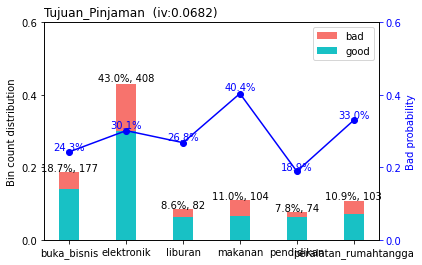

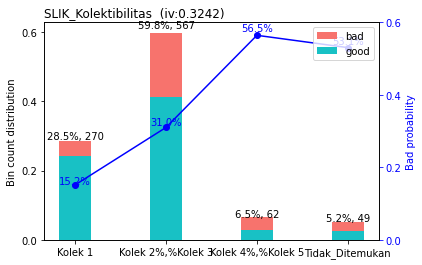

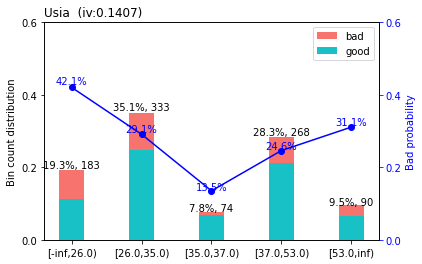

In [121]:
# Membuat bin WOE dan IV 
bins = sc.woebin(df_model, y="default")
sc.woebin_plot(bins)

# binning adjustment (jika ada)
breaks_adj = {
}
bins_adj = sc.woebin(df_model, y="default", breaks_list=breaks_adj)

# Membuat variabel yang berisi WOE dan IV
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

### Modeling dengan regresi logistik (logistic regression)

In [122]:
# regresi logistik
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1) #dapat mengganti parameter disini
lr.fit(X_train, y_train)

LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

### Melakukan prediksi dari hasil model

In [124]:
# hasil prediksi
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]
print(test_pred)

[0.23727427 0.15475725 0.48429537 0.48429537 0.2197913  0.31169055
 0.13815668 0.31169055 0.11066697 0.38774303 0.25991427 0.23754241
 0.15542884 0.27932901 0.13815668 0.31169055 0.67663283 0.46341231
 0.27974398 0.26645249 0.23727427 0.35000917 0.32937884 0.45972221
 0.13815668 0.12678267 0.25991427 0.11066697 0.09010692 0.15032385
 0.11066697 0.45972221 0.11393584 0.18661267 0.25991427 0.14222063
 0.17129194 0.45972221 0.38774303 0.25991427 0.31169055 0.31169055
 0.48429537 0.13815668 0.25991427 0.35000917 0.14222063 0.11066697
 0.23727427 0.13429823 0.31169055 0.45972221 0.38774303 0.38774303
 0.13815668 0.54706167 0.13815668 0.06612792 0.18574834 0.48429537
 0.44290964 0.15475725 0.27932901 0.31169055 0.35000917 0.18574834
 0.40566154 0.54338001 0.26645249 0.33323143 0.45972221 0.31169055
 0.23727427 0.25347899 0.25991427 0.45972221 0.31169055 0.52686753
 0.31169055 0.09010692 0.27932901 0.13815668 0.19447132 0.23754241
 0.20204683 0.26645249 0.26645249 0.11393584 0.55136702 0.4056

### Evaluasi hasil model

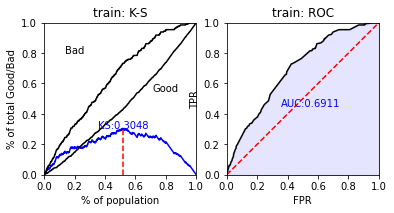

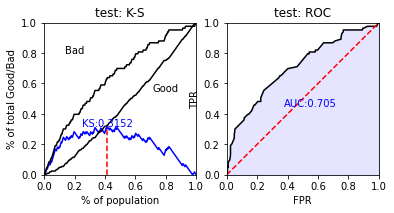

{'basepoints':      variable  bin  points
0  basepoints  NaN     451, 'Tujuan_Pinjaman':           variable                    bin  points
0  Tujuan_Pinjaman            buka_bisnis    14.0
1  Tujuan_Pinjaman             elektronik    -2.0
2  Tujuan_Pinjaman                liburan     7.0
3  Tujuan_Pinjaman                makanan   -26.0
4  Tujuan_Pinjaman             pendidikan    31.0
5  Tujuan_Pinjaman  peralatan_rumahtangga    -9.0, 'Usia':    variable          bin  points
10     Usia  [-inf,26.0)   -45.0
11     Usia  [26.0,35.0)     1.0
12     Usia  [35.0,37.0)    78.0
13     Usia  [37.0,53.0)    19.0
14     Usia   [53.0,inf)    -7.0, 'SLIK_Kolektibilitas':               variable                bin  points
6  SLIK_Kolektibilitas            Kolek 1    52.0
7  SLIK_Kolektibilitas  Kolek 2%,%Kolek 3    -5.0
8  SLIK_Kolektibilitas  Kolek 4%,%Kolek 5   -70.0
9  SLIK_Kolektibilitas    Tidak_Ditemukan   -62.0}


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


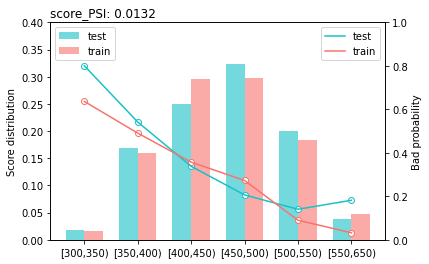

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.013222}

In [125]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
print(card)

# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# Pembuatan Scorecard Model secara Manual
### Penggunaan WOE dan IV dalam Scorecard


### Kelompok Bin WOE untuk SLIK_Kolektibilitas

In [133]:
# Reference https://stackoverflow.com/questions/60892714/how-to-get-the-weight-of-evidence-woe-and-information-value-iv-in-python-pan

print(pd.crosstab(df_clean['SLIK_Kolektibilitas'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

default                0    1
SLIK_Kolektibilitas          
Kolek 1              229   41
Kolek 2               58   26
Kolek 3              333  150
Kolek 4                6    8
Kolek 5               21   27
Tidak_Ditemukan       23   26
default                     0         1       woe        iv
SLIK_Kolektibilitas                                        
Kolek 1              0.341791  0.147482 -0.840493  0.324213
Kolek 2              0.086567  0.093525  0.077310  0.324213
Kolek 3              0.497015  0.539568  0.082149  0.324213
Kolek 4              0.008955  0.028777  1.167339  0.324213
Kolek 5              0.031343  0.097122  1.130971  0.324213
Tidak_Ditemukan      0.034328  0.093525  1.002259  0.324213


In [134]:
# Variabel SLIK_Kolektibilitas membuat kelompok bin WOE

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          'Kolek 1',
          'Kolek 2&3',
          'Kolek 4&5',
          'Kolek Tidak_Ditemukan'
          ]

df_clean['SLIK_Kolektibilitas_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['SLIK_Kolektibilitas_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['SLIK_Kolektibilitas_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 1' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 2' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 3' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 4' ) | ( df_clean['SLIK_Kolektibilitas'] == 'Kolek 5' ),
             ( df_clean['SLIK_Kolektibilitas'] == 'Tidak_Ditemukan' )
             ]

choices = [
          -0.8405,
          0.0814,
          1.1392,
          1.0023
          ]

df_clean['SLIK_Kolektibilitas_WOE'] = np.select(conditions, choices)

Kolek 2&3                59.810127
Kolek 1                  28.481013
Kolek 4&5                 6.540084
Kolek Tidak_Ditemukan     5.168776
Name: SLIK_Kolektibilitas_Bin, dtype: float64
default                         0         1       woe        iv
SLIK_Kolektibilitas_Bin                                        
Kolek 1                  0.341791  0.147482 -0.840493  0.324191
Kolek 2&3                0.583582  0.633094  0.081433  0.324191
Kolek 4&5                0.040299  0.125899  1.139168  0.324191
Kolek Tidak_Ditemukan    0.034328  0.093525  1.002259  0.324191


### Kelompok Bin WOE untuk Usia

In [135]:
# Variabel Usia

conditions = [
             ( df_clean['Usia'] <= 25 ),
             ( df_clean['Usia'] >= 26 ) & ( df_clean['Usia'] <= 30),
             ( df_clean['Usia'] >= 31 ) & ( df_clean['Usia'] <= 35 ),
             ( df_clean['Usia'] >= 36 ) & ( df_clean['Usia'] <= 40 ),
             ( df_clean['Usia'] >= 41 ) & ( df_clean['Usia'] <= 50 ),
             ( df_clean['Usia'] >= 51 )
             ]

choices = [
          '1.<=25',
          '2.26-30',
          '3.31-35',
          '4.36-40',
          '5.41-50',
          '6.>=51'
          ]
df_clean['Usia_Bin'] = np.select(conditions, choices)

# Untuk melihat proporsi (dalam persentase) dari variabel Usia
print(df_clean['Usia_Bin'].value_counts(normalize=True) * 100)

print(pd.crosstab(df_clean['Usia_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Usia_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( df_clean['Usia'] <= 25 ),
             ( df_clean['Usia'] >= 26 ) & ( df_clean['Usia'] <= 30),
             ( df_clean['Usia'] >= 31 ) & ( df_clean['Usia'] <= 35 ),
             ( df_clean['Usia'] >= 36 ) & ( df_clean['Usia'] <= 40 ),
             ( df_clean['Usia'] >= 41 ) & ( df_clean['Usia'] <= 50 ),
             ( df_clean['Usia'] >= 51 )
             ]

choices = [
          0.560023,
          -0.009605,
          -0.227053,
          -0.344119,
          -0.185054,
          -0.049879
          ]
df_clean['Usia_WOE'] = np.select(conditions, choices)

2.26-30    21.729958
1.<=25     19.303797
3.31-35    17.405063
5.41-50    16.455696
4.36-40    13.924051
6.>=51     11.181435
Name: Usia_Bin, dtype: float64
default     0   1
Usia_Bin         
1.<=25    106  77
2.26-30   146  60
3.31-35   124  41
4.36-40   102  30
5.41-50   116  40
6.>=51     76  30
default          0         1       woe       iv
Usia_Bin                                       
1.<=25    0.158209  0.276978  0.560023  0.09601
2.26-30   0.217910  0.215827 -0.009605  0.09601
3.31-35   0.185075  0.147482 -0.227053  0.09601
4.36-40   0.152239  0.107914 -0.344119  0.09601
5.41-50   0.173134  0.143885 -0.185054  0.09601
6.>=51    0.113433  0.107914 -0.049879  0.09601


### Kelompok Bin WOE untuk Tujuan Pinjaman

In [137]:
# Variabel Tujuan_Pinjaman

# Untuk melihat proporsi (dalam persentase) dari variabel Tujuan_Pinjaman
print(df_clean['Tujuan_Pinjaman'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))

print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          '1.pendidikan',
          '2.buka_bisnis',
          '3.liburan',
          '4.elektronik',
          '5.peralatan_rumahtangga',
          '6.makanan'
          ]
df_clean['Tujuan_Pinjaman_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'], df_clean['default']))

df_woe_iv = (pd.crosstab(df_clean['Tujuan_Pinjaman_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( (df_clean['Tujuan_Pinjaman'] == 'pendidikan') ), 
             ( df_clean['Tujuan_Pinjaman'] == 'buka_bisnis' ),
             ( (df_clean['Tujuan_Pinjaman'] == 'liburan') ),
             ( (df_clean['Tujuan_Pinjaman'] == 'elektronik')   ), 
             ( df_clean['Tujuan_Pinjaman'] == 'peralatan_rumahtangga' ),
             ( df_clean['Tujuan_Pinjaman'] == 'makanan' )
             ]

choices = [
          -0.8,
          -0.5,
          -0.3,
          0.4,
          0.5,
          0.8
          ]
df_clean['Tujuan_Pinjaman_WOE'] = np.select(conditions, choices)

elektronik               43.037975
buka_bisnis              18.670886
makanan                  10.970464
peralatan_rumahtangga    10.864979
liburan                   8.649789
pendidikan                7.805907
Name: Tujuan_Pinjaman, dtype: float64
default                       0         1       woe        iv
Tujuan_Pinjaman                                              
buka_bisnis            0.200000  0.154676 -0.256983  0.068185
elektronik             0.425373  0.442446  0.039352  0.068185
liburan                0.089552  0.079137 -0.123646  0.068185
makanan                0.092537  0.151079  0.490192  0.068185
pendidikan             0.089552  0.050360 -0.575631  0.068185
peralatan_rumahtangga  0.102985  0.122302  0.171911  0.068185
default                    0    1
Tujuan_Pinjaman_Bin              
1.pendidikan              60   14
2.buka_bisnis            134   43
3.liburan                 60   22
4.elektronik             285  123
5.peralatan_rumahtangga   69   34
6.makanan         

### Latihan membuat WOE untuk Variabel Kategori: Email_Domain_Provider, Lama_Cicilan, Device_Apps_Segmentation, Mobile_Provider

In [128]:
# Variabel Kategori -> Buat kelompok Bin WOE dan Hitung IV


### Latihan membuat WOE untuk Variabel Numerik: API_CreditScore_Vendor_B, API_CreditScore_Vendor_A, SLIK_Cicilan_Bulanan, SLIK_Outstanding_CC

In [ ]:
# Variabel Numerik -> Buat kelompok Bin WOE dan Hitung IV


# Feature Engineering (Membuat Variabel Baru)

### Variabel Debt Burden Ratio (DBR)

In [129]:
conditions = [
             ( df_clean['Pendapatan_perbulan'] == '1. < 1 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '2. 1 - 5 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '3. 5 - 10 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '4. 10 - 20 juta' ),
             ( df_clean['Pendapatan_perbulan'] == '5. >20 juta' )
             ]

choices = [
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 1000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 5000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 10000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 20000000 ),
          ( (df_clean['SLIK_Cicilan_Bulanan'] + (df_clean['SLIK_Outstanding_CC'] * 0.1) ) / 30000000 )
          ]
df_clean['DBR'] = np.select(conditions, choices)

In [130]:
# Jangan lupa juga untuk membuat WOE dan IV

conditions = [
             ( df_clean['DBR'] <= 0.00 ),
             ( df_clean['DBR'] <= 0.10 ),
             ( df_clean['DBR'] <= 0.20 ),
             ( df_clean['DBR'] <= 0.30 ),
             ( df_clean['DBR'] <= 0.40 ),
             ( df_clean['DBR'] <= 0.50 ),
             ( df_clean['DBR'] <= 0.60 ),
             ( df_clean['DBR'] > 0.60 )
             ]

choices = [
          '1.0%',
          '2.0-10%',
          '3.10-20%',
          '4.20-30%',
          '5.30-40%',
          '6.40-50%',
          '7.50-60%',
          '8.>60%',
          ]
df_clean['DBR_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['DBR_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['DBR_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['DBR_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['DBR'] <= 0.0 ),
             ( df_clean['DBR'] <= 0.1 ),
             ( df_clean['DBR'] <= 0.2 ),
             ( df_clean['DBR'] <= 0.3 ),
             ( df_clean['DBR'] <= 0.4 ),
             ( df_clean['DBR'] <= 0.5 ),
             ( df_clean['DBR'] <= 0.6 ),
             ( df_clean['DBR'] > 0.6 )
             ]

choices = [
          1.145360,
          -0.814122,
          -0.303039,
          -0.036634,
          -0.072352,
          0.062895,
          0.142058,
          0.728616,
          ]
df_clean['DBR_WOE'] = np.select(conditions, choices)

default     0   1
DBR_Bin          
1.0%       23  30
2.0-10%   272  50
3.10-20%   62  19
4.20-30%   60  24
5.30-40%   57  22
6.40-50%   43  19
7.50-60%   46  22
8.>60%    107  92
2.0-10%     33.966245
8.>60%      20.991561
4.20-30%     8.860759
3.10-20%     8.544304
5.30-40%     8.333333
7.50-60%     7.172996
6.40-50%     6.540084
1.0%         5.590717
Name: DBR_Bin, dtype: float64
default          0         1       woe        iv
DBR_Bin                                         
1.0%      0.034328  0.107914  1.145360  0.402759
2.0-10%   0.405970  0.179856 -0.814122  0.402759
3.10-20%  0.092537  0.068345 -0.303039  0.402759
4.20-30%  0.089552  0.086331 -0.036634  0.402759
5.30-40%  0.085075  0.079137 -0.072352  0.402759
6.40-50%  0.064179  0.068345  0.062895  0.402759
7.50-60%  0.068657  0.079137  0.142058  0.402759
8.>60%    0.159701  0.330935  0.728616  0.402759


### Variabel Baru: Apakah alamat kantor dan rumah berdekatan?


In [131]:
conditions = [
             ( df_clean['Alamat_Rumah'] == df_clean['Alamat_Kantor'] ),
             ( df_clean['Alamat_Rumah'] != df_clean['Alamat_Kantor'] ),
             ]

choices = [
          '1.Rumah_Kantor_Dekat',
          '2.Rumah_Kantor_Jauh'
          ]
df_clean['Alamat_Rumah_Kantor'] = np.select(conditions, choices)

In [132]:
# Membuat WOE dan IV

conditions = [
             ( df_clean['Alamat_Rumah_Kantor'] == '1.Rumah_Kantor_Dekat' ),
             ( df_clean['Alamat_Rumah_Kantor'] == '2.Rumah_Kantor_Jauh' )
             ]

choices = [
          '1.Rumah_Kantor_Dekat',
          '2.Rumah_Kantor_Jauh'
          ]
df_clean['Alamat_Rumah_Kantor_Bin'] = np.select(conditions, choices)

print(pd.crosstab(df_clean['Alamat_Rumah_Kantor_Bin'], df_clean['default']))

# Untuk melihat proporsi (dalam persentase) dari variabel API_CreditScore_Vendor_A_Bin
print(df_clean['Alamat_Rumah_Kantor_Bin'].value_counts(normalize=True) * 100)

df_woe_iv = (pd.crosstab(df_clean['Alamat_Rumah_Kantor_Bin'],df_clean['default'],normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                           (dfx[1]-dfx[0]))))
print(df_woe_iv)

conditions = [
             ( df_clean['Alamat_Rumah_Kantor'] == '1.Rumah_Kantor_Dekat' ),
             ( df_clean['Alamat_Rumah_Kantor'] == '2.Rumah_Kantor_Jauh' )
             ]

choices = [
          -0.313143,
          0.092824
          ]
df_clean['Alamat_Rumah_Kantor_WOE'] = np.select(conditions, choices)

default                    0    1
Alamat_Rumah_Kantor_Bin          
1.Rumah_Kantor_Dekat     178   54
2.Rumah_Kantor_Jauh      492  224
2.Rumah_Kantor_Jauh     75.527426
1.Rumah_Kantor_Dekat    24.472574
Name: Alamat_Rumah_Kantor_Bin, dtype: float64
default                         0         1       woe        iv
Alamat_Rumah_Kantor_Bin                                        
1.Rumah_Kantor_Dekat     0.265672  0.194245 -0.313143  0.028997
2.Rumah_Kantor_Jauh      0.734328  0.805755  0.092824  0.028997


## Latihan membuat variabel baru usia dan status


In [139]:
# Latihan membuat variabel baru usia dan status
# Koding disini. Jangan lupa untuk membuat kelompok WOE



# Proses Modeling secara Manual

## Pemilihan Variabel untuk Pembuatan Model

In [138]:
# Persiapan membuat model
# Memilih variabel yang akan diinput ke dalam model

df_model_WOE = df_clean[['default','SLIK_Kolektibilitas_WOE','Usia_WOE','Tujuan_Pinjaman_WOE']]
df_model_Bin = df_clean[['default','SLIK_Kolektibilitas_Bin','Usia_Bin','Tujuan_Pinjaman_Bin']]
df_model = df_clean[['default','SLIK_Kolektibilitas','Usia','Tujuan_Pinjaman']]

In [140]:
# Dalam contoh ini tidak ada oversampling/undersampling

### Membagi dataset menjadi train dan test

In [143]:
# Membagi dataset menjadi development(train) dan test

y = df_model_WOE.loc[:,'default']
X = df_model_WOE.loc[:,df_model_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Modeling dengan Regresi Logistik (logistic regression) dan hasil regresi: koefisien dan intercept

In [145]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Coefficient: ', lr.feature_names_in_, lr.coef_)
print('Intercept: ', lr.intercept_)
print(lr.classes_)

Coefficient:  ['SLIK_Kolektibilitas_WOE' 'Usia_WOE' 'Tujuan_Pinjaman_WOE'] [[1.04530592 0.90924293 0.64475998]]
Intercept:  [-0.95759636]
[0 1]


### Hasil dari Model Regresi Logistik

In [146]:
# Jika ingin mengetahui detail dari regresi logistik. Tapi koefisien dan intercept tidak akan sama persis karena pendekatannya beda
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.638753
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  663
Model:                          Logit   Df Residuals:                      660
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Nov 2021   Pseudo R-squ.:                -0.04986
Time:                        16:11:57   Log-Likelihood:                -423.49
converged:                       True   LL-Null:                       -403.38
Covariance Type:            nonrobust   LLR p-value:                     1.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
SLIK_Kolektibilitas_WOE     1.0245      0.152      6.747      0.000       0.727       1.322
Usia_WOE                    1.0830      0.282      3.842      0.000       0.531       1.635
Tujuan_Pinjaman_WOE         0.1176      0.159      0.740      0.459      -0.194       0.429
===========================================================================================
"""

In [147]:
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)
print(test_predict)
# Cara adalah 0 jika bayar, dan 1 jika default

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [148]:
test_pred_proba = lr.predict_proba(X_test)
print(test_pred_proba)
# Cara bacanya adalah 0.635 adalah probabilitas 0 dan 0.364 adaalah probabilitas 1
# Dengan mengacu probabilitas 1 diatas 0.5 maka default / 1

[[0.62830673 0.37169327]
 [0.69445935 0.30554065]
 [0.51023145 0.48976855]
 [0.83529433 0.16470567]
 [0.52632751 0.47367249]
 [0.79069194 0.20930806]
 [0.91411933 0.08588067]
 [0.68629694 0.31370306]
 [0.76916844 0.23083156]
 [0.52632751 0.47367249]
 [0.82059841 0.17940159]
 [0.91107363 0.08892637]
 [0.7988021  0.2011979 ]
 [0.81873141 0.18126859]
 [0.71656624 0.28343376]
 [0.66500779 0.33499221]
 [0.92211552 0.07788448]
 [0.80171531 0.19828469]
 [0.78115037 0.21884963]
 [0.42490598 0.57509402]
 [0.76916844 0.23083156]
 [0.63718034 0.36281966]
 [0.60693042 0.39306958]
 [0.65097728 0.34902272]
 [0.80239561 0.19760439]
 [0.91233558 0.08766442]
 [0.86136619 0.13863381]
 [0.51023145 0.48976855]
 [0.90059991 0.09940009]
 [0.86327799 0.13672201]
 [0.76916844 0.23083156]
 [0.68629694 0.31370306]
 [0.43120641 0.56879359]
 [0.63718034 0.36281966]
 [0.85627851 0.14372149]
 [0.79668779 0.20331221]
 [0.46194959 0.53805041]
 [0.59881385 0.40118615]
 [0.65097728 0.34902272]
 [0.68629694 0.31370306]


In [149]:
# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, test_predict))
conf_mat = confusion_matrix(y_true=y_test, y_pred=test_predict)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, test_pred_proba[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       204
           1       0.52      0.16      0.25        81

    accuracy                           0.72       285
   macro avg       0.63      0.55      0.54       285
weighted avg       0.68      0.72      0.66       285

Confusion matrix:
 [[192  12]
 [ 68  13]]
ROC Score: 0.6649721617041879


## Modeling logistic regression dengan Stepwise

In [150]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

lr = LogisticRegression()
lr.fit(X_train, y_train)

feature_names = np.array(X.columns)

sfs_backward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="backward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise backward: ', feature_names[sfs_backward.get_support()]
)

sfs_forward = SequentialFeatureSelector(
    lr, n_features_to_select=None, direction="forward"
).fit(X_train, y_train)

print(
    'Variabel signifikan stepwise forward: ', feature_names[sfs_forward.get_support()]
)

Variabel signifikan stepwise backward:  ['SLIK_Kolektibilitas_WOE']
Variabel signifikan stepwise forward:  ['SLIK_Kolektibilitas_WOE']


In [151]:
# Testing hasil stepwise

df_step = df_clean[['SLIK_Kolektibilitas_WOE','default']]

# Membagi dataset menjadi development(train) dan test

y_step = df_step.loc[:,'default']
X_step = df_step.loc[:,df_step.columns != 'default']

from sklearn.model_selection import train_test_split
X_train_step, X_test_step, y_train_step, y_test_step = train_test_split(X_step, y_step, test_size=0.30, random_state=42)

lr_step = LogisticRegression()
lr_step.fit(X_train_step, y_train_step)

test_predict_step = lr_step.predict(X_test_step)
test_pred_proba_step = lr_step.predict_proba(X_test_step)

# Bagaimana cara tahu bahwa model itu bagus atau tidak?
# Pembahasan di bagian evaluasi model
# koding nya adalah
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test_step, test_predict_step))
conf_mat = confusion_matrix(y_true=y_test_step, y_pred=test_predict_step)
print('Confusion matrix:\n', conf_mat)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test_step, test_pred_proba_step[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.82       204
           1       0.51      0.22      0.31        81

    accuracy                           0.72       285
   macro avg       0.63      0.57      0.57       285
weighted avg       0.68      0.72      0.68       285

Confusion matrix:
 [[187  17]
 [ 63  18]]
ROC Score: 0.6266037279109173


## Membuat Scoring dari probabilitas

In [152]:
# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1.0/20 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

In [153]:
train_pred_proba = lr.predict_proba(X_train)[:,1]
train_log_pred = lr.predict_log_proba(X_train)[:,1]

score = A - B*np.log(train_pred_proba/(1-train_pred_proba))
score_from_log = (P0 - B * np.log(theta0)) - B * train_log_pred

df_train_pred_proba = pd.DataFrame(train_pred_proba, columns=['train_pred_proba'])
df_train_log_pred = pd.DataFrame(train_log_pred, columns=['Logit_Result'])

df_train_score = pd.DataFrame(score, columns=['Score'])
df_train_log_score = pd.DataFrame(score_from_log, columns=['Score_from_log'])

# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_model_result = pd.concat([df_train, df_train_pred_proba, df_train_log_pred, df_train_score, df_train_log_score], axis = 1)

In [154]:
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_model_result.to_csv('df_model_result.csv') 
files.download('df_model_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Contoh Perhitungan Scorecard secara Manual


In [ ]:
# Persiapan membuat model
# Memilih variabel yang akan diinput ke dalam model

df_simple_WOE = df_clean[['default','SLIK_Kolektibilitas_WOE','DBR_WOE']]
df_simple_Bin = df_clean[['default','SLIK_Kolektibilitas_Bin','DBR_Bin']]
df_simple = df_clean[['default','SLIK_Kolektibilitas','DBR']]

In [ ]:
# Membagi dataset menjadi development(train) dan test

y = df_simple_WOE.loc[:,'default']
X = df_simple_WOE.loc[:,df_simple_WOE.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

In [ ]:
train_predict = lr.predict(X_train)
test_predict = lr.predict(X_test)

test_pred_proba = lr.predict_proba(X_test)

In [ ]:
# Membuat scoring
P0 = 600 # Target Score
PDO = 50 # Target Odds
theta0 = 1.0/20 # Points double odds
B = PDO/np.log(2)
A = P0 + B * np.log(theta0)

train_pred_proba = lr.predict_proba(X_train)[:,1]
train_log_pred = lr.predict_log_proba(X_train)[:,1]

score = A - B*np.log(train_pred_proba/(1-train_pred_proba))
score_from_log = (P0 - B * np.log(theta0)) - B * train_log_pred

df_train_pred_proba = pd.DataFrame(train_pred_proba, columns=['train_pred_proba'])
df_train_log_pred = pd.DataFrame(train_log_pred, columns=['Logit_Result'])

df_train_score = pd.DataFrame(score, columns=['Score'])
df_train_log_score = pd.DataFrame(score_from_log, columns=['Score_from_log'])

# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_model_result = pd.concat([df_train, df_train_pred_proba, df_train_log_pred, df_train_score, df_train_log_score], axis = 1)

# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_model_result.to_csv('df_model_result.csv') 
files.download('df_model_result.csv')

In [ ]:
y = df_simple_Bin.loc[:,'default']
X = df_simple_Bin.loc[:,df_simple_Bin.columns != 'default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'default')

# Melakukan WOE binning dengan adjustment
breaks_adj = {
    'SLIK_Kolektibilitas_Bin': ['Kolek 1','Kolek 2&3','Kolek 4&5','Kolek Tidak_Ditemukan'],
    'DBR_Bin': ["1.0%", "2.0-10%","3.10-20%","4.20-30%","5.30-40%","6.40-50%","7.50-60%","8.>60%"]
}
bins_adj = scpy.woebin(df_train, y="default", breaks_list=breaks_adj)

train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins_adj)
test_woe = scpy.woebin_ply(test, bins_adj)


y_train = train_woe.loc[:,'default']
X_train = train_woe.loc[:,train_woe.columns != 'default']
y_test = test_woe.loc[:,'default']
X_test = test_woe.loc[:,train_woe.columns != 'default']

# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept = True)
lr.fit(X_train, y_train)

print(lr.coef_)
print(lr.get_params(deep=True))

# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins_adj, lr, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
print(card)

# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# Dalam bentuk dataframe lengkap
df_train_woe = pd.concat([train, train_woe, train_score], axis = 1)
# Untuk memudahkan membaca hasil, maka disimpan dalam bentuk csv dan didownload
from google.colab import files
df_train_woe.to_csv('df_train_woe.csv') 
files.download('df_train_woe.csv')